In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Why SVMs for this problem? 
- We have a high degree of dimensionality to this data, therefore the SVMs should perform better than if there was a lower degree of dimensionality

Why not SVMs for this problem? 
- SVMs dont work well with large datasets, i.e. the training times can be very long. (Possible solution: perform PCA beforehand to reduce the dataset size, however this also reduces dimensionality and therefore reduces the effectiveness of the SVM)
- Not sure there is a clear split between the 'loan repaid' data and the 'loan not repaid' data, will need to check this. 

In [2]:
# Importing pre-processed data
df = pd.read_csv('data/pre_proc_data.csv',index_col=0)
# Reducing the data size for speed training. 
df_train_samp = df.sample(frac=0.2, random_state=101)
print ("Number of samples in full dataset = " + str(len(df)))
print ("Number of samples in sample dataset for faster training = " + str(len(df_train_samp)))

Number of samples in full dataset = 395219
Number of samples in sample dataset for faster training = 79044


In [9]:
# Splitting out features and label 
X = df_train_samp.drop('loan_repaid',axis=1).values
y = df_train_samp['loan_repaid'].values
X_full = df.drop('loan_repaid',axis=1).values
y_full = df['loan_repaid'].values

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [43]:
# Getting training/testing data from the reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [54]:
X_train.shape

(39522, 82)

<AxesSubplot:ylabel='Count'>

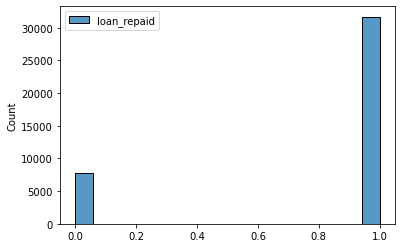

In [45]:
df_ytrain = pd.DataFrame(y_train,columns=['loan_repaid'])
df_ytrain
sns.histplot(df_ytrain)

In [46]:
model_test = SVC()

In [48]:
model_test.fit(X_train,y_train)

SVC()

In [49]:
predictions = model_test.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89     39522

    accuracy                           0.80     39522
   macro avg       0.50      0.40      0.45     39522
weighted avg       1.00      0.80      0.89     39522



In [52]:
print(confusion_matrix(predictions,y_test))

[[    0     0]
 [ 7833 31689]]
